In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
pd.set_option('max_columns',100)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# problem statement :
### 1)given cancer diagnostics by checking the poperties of tumor data,need to predict weather the tumor is cancerous or not.
### 2)target is diagnosis column

# data preprocessing

In [4]:
#all the data types as float  
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [6]:
# no null values
df1 = df.isnull()
for column in df1.columns:
    print('null values: ',len(df1)-df1[column].value_counts()[0],' , non null values: ',df1[column].value_counts()[0],' , column:',column)

null values:  0  , non null values:  569  , column: id
null values:  0  , non null values:  569  , column: diagnosis
null values:  0  , non null values:  569  , column: radius_mean
null values:  0  , non null values:  569  , column: texture_mean
null values:  0  , non null values:  569  , column: perimeter_mean
null values:  0  , non null values:  569  , column: area_mean
null values:  0  , non null values:  569  , column: smoothness_mean
null values:  0  , non null values:  569  , column: compactness_mean
null values:  0  , non null values:  569  , column: concavity_mean
null values:  0  , non null values:  569  , column: concave points_mean
null values:  0  , non null values:  569  , column: symmetry_mean
null values:  0  , non null values:  569  , column: fractal_dimension_mean
null values:  0  , non null values:  569  , column: radius_se
null values:  0  , non null values:  569  , column: texture_se
null values:  0  , non null values:  569  , column: perimeter_se
null values:  0  ,

In [7]:
# removing duplicates
df.drop_duplicates(subset=df.columns,inplace=True)

In [8]:
#label encoding of diagnosis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target']=le.fit_transform(df['diagnosis'])

In [9]:
df.corr()['target']

id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [10]:
x = df.drop(columns=['id','diagnosis','target']).values
y = df['target'].values

Applying min_max_scaler 

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

# Visuvaisation

<AxesSubplot:>

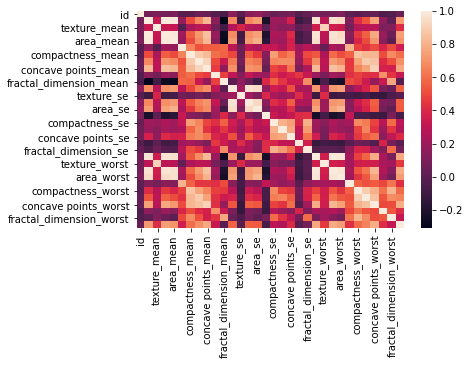

In [12]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

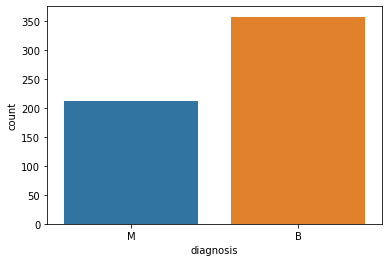

In [13]:
# total no of malignenet and non-malignent tumors which are cause of canser
sns.countplot(x='diagnosis',data=df)

<AxesSubplot:xlabel='diagnosis', ylabel='concave points_worst'>

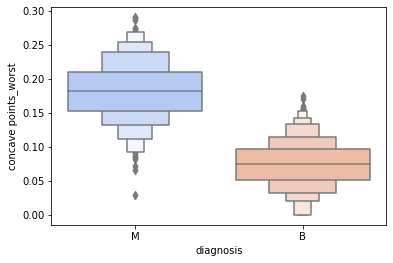

In [14]:
#out of all the features concave points_worst has heighest correlation factor with the target 'diagnosis'
sns.boxenplot(y='concave points_worst',x='diagnosis',data=df,palette="coolwarm")

# Logistic Regression Model

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [17]:
# here 1 means -> tumer is malignent and therefore person is victim of canser
df_result1 = pd.DataFrame({'actual':y_test,'predicted':pred})
df_result1.replace(to_replace=[1,0],value=['M','B'],inplace=True)
df_result1.head(15)

,actual,predicted
0,M,M
1,M,M
2,B,B
3,M,M
4,B,B
5,M,M
6,B,B
7,B,B
8,B,B
9,B,B


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        70
           1       1.00      0.91      0.95        44

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



# KNN Model 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
x1 = df.drop(columns=['id','diagnosis','target']).values
x1=scaler.fit_transform(x1)
y1 = df['diagnosis'].values
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [21]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier()

In [22]:
df_results2 = pd.DataFrame({'actual':y1_test,'predicted':knn.predict(x1_test)})
df_results2.head(10)

,actual,predicted
0,B,B
1,M,M
2,M,M
3,B,B
4,B,B
5,M,M
6,M,M
7,M,M
8,B,M
9,B,B


In [23]:
print(classification_report(df_results2['actual'],df_results2['predicted']))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Support Vector Machine(svm) Model

In [24]:
from sklearn.svm import NuSVC
model = NuSVC(kernel='rbf')
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y,test_size=.25,random_state=40)
model.fit(x2_train,y2_train)

NuSVC()

In [25]:
df_result3 = pd.DataFrame({'actual':y2_test,'predicted':model.predict(x2_test)})
df_result3.replace(to_replace=[1,0],value=['M','B'],inplace=True)
df_result3.head(10)

,actual,predicted
0,B,B
1,M,M
2,B,B
3,B,B
4,M,M
5,B,B
6,B,B
7,B,B
8,B,B
9,B,B


In [26]:
# for kernel = 'rbf'
print(classification_report(df_result3['actual'],df_result3['predicted']))

              precision    recall  f1-score   support

           B       0.99      0.99      0.99        98
           M       0.98      0.98      0.98        45

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [27]:
#kernel='linear'
model = NuSVC(kernel='linear')
model.fit(x2_train,y2_train)
df_result3 = pd.DataFrame({'actual':y2_test,'predicted':model.predict(x2_test)})
df_result3.replace(to_replace=[1,0],value=['M','B'],inplace=True)
print(classification_report(df_result3['actual'],df_result3['predicted']))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        98
           M       0.98      0.91      0.94        45

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



# Naive Bayes model

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.25,random_state=30)
nb.fit(x3_train,y3_train)

df_result4 = pd.DataFrame({'actual':y3_test,'predicted':nb.predict(x3_test)})
df_result4.replace(to_replace=[1,0],value=['M','B'],inplace=True)
print(classification_report(df_result4['actual'],df_result4['predicted']))

              precision    recall  f1-score   support

           B       0.93      0.92      0.93        91
           M       0.87      0.88      0.88        52

    accuracy                           0.91       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



# CONCLUSION :-

## Model Accuracy order 
### Naive Bayes < KNN <= Logistic Regression < SVM (linear kernel < rbf kernel)
### Therfore amoung the experimented model SVM with "rbf "  kernel yielded highest accuracy